In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv




In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importation des fichiers


1.   Un fichier **population**

2.   Un fichier **insécurité alimentaire**

3.   Un fichier de **disponibilité alimentaire** pour l’année 2013

4.   Un fichier d’**aide alimentaire**



## Population (pop)



*   Le pays
*   L'année
*   La population, exprimée en milliers d’habitants.



In [3]:
# Création du data frame pop

pop = pd.read_csv('population.csv')
display(pop)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [4]:
# On renome les colonnes

pop.rename(columns = {'Zone':'pays', 'Année':"annee",'Valeur': "population_totale"} , inplace=True)
pop.head(1)

,pays,annee,population_totale
0,Afghanistan,2013,32269.589


In [5]:
#On crée un nouveau data frame pour la population de 2017

pop2017 = pop.loc[pop['annee'] == 2017, :]
pop2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pays               236 non-null    object 
 1   annee              236 non-null    int64  
 2   population_totale  236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [6]:
np.shape(pop2017["pays"].unique())


(236,)

## Insécurité alimentaire (besoin)

- Le pays.
- Intervalle d’années.
- Le nombre de personnes en sous-alimentation en millions d’habitants (ex. : pour
l’intervalle 2012-2014, le nombre de personnes correspond à la moyenne sur ces 3
années, on peut le résumer en 2013).

In [7]:
besoin = pd.read_csv('sous_nutrition.csv')
display(besoin)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [8]:
besoin.describe()


,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [9]:
# On voit toutes les années pour lesquelles on a des données dans le fichier
besoin["Année"].unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [10]:
# On remplace les années pour plus de facilité dans les séléctions
#df[column_name].replace([old_value1, old_value2, old_value3],[new_value1, new_value2, new_value3])

besoin["Année"].replace(['2012-2014', '2013-2015','2014-2016', '2015-2017', '2016-2018',
       '2017-2019'],['2013','2014','2015','2016','2017','2018'],inplace =True)


In [11]:
besoin["Année"].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018'], dtype=object)

In [12]:
#On renomme les colonnes

besoin.rename(columns = {'Zone':'pays', 'Année':"annee",'Valeur': "valeur"} )


,pays,annee,valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


In [13]:
besoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [14]:
#Création d'un fichier pour les valeurs de 2017

besoin2017 = besoin.loc[besoin['Année'] == '2017', :]
besoin2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 4 to 1216
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    203 non-null    object
 1   Année   203 non-null    object
 2   Valeur  104 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB


## Disponibilité alimentaire (dispo)

- Le pays.
- Le produit.
- 4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités
bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter
cependant que la notation kcal est un abus de langage, elle correspond à une calorie
réelle.
- 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité
alimentaire. Elles sont toutes exprimées en milliers de tonnes.
- Enfin, une variable type qui précise si le produit est d’origine animale ou végétale

In [15]:
dispo = pd.read_csv('dispo_alimentaire.csv')
display(dispo)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


La **fomule qui lie l'acquisition et l'utilisation de la disponibilité intérieure** est la suivante :

Production + Importations + Variation - *Exportations* **= DISPONIBILITE =** Aliments pour animaux + Nourriture + Semences + Traitement + Autres utilisations - *Pertes*


In [16]:
# On regarde les statistiques générales du data frame dispo

dispo.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [17]:
# Les infos sur le data frame
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [18]:
dispo['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [19]:
"""Exemple Aliment en France utilisé pour les animaux"""

#dispo.loc[(dispo['Zone' ]== 'France') & (dispo["Aliments pour animaux"].notna() ) ,:].head(5)


'Exemple Aliment en France utilisé pour les animaux'

##  Aide alimentaire (aide)

 

- Le pays bénéficiaire.
- L’année.
- Le produit.
- La quantité qui a été donnée comme aide alimentaire, en tonnes.


In [20]:
# On importe le fichier et on cré le data frame aide
aide = pd.read_csv('aide_alimentaire.csv')
display(aide)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [21]:
aide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


# Questions de Mélanie

## Pays les plus sous alimentés en 2017 

In [22]:
# On utilise les données avec l'année 2017
# On converti les <0.1 en 0 
#(( On supprime les lignes où la valeur est NaN))
# On converti le data type de Valeur en float

besoin2017.rename(columns = {'Valeur': "pop_sous_nutrition", "Année" : "annee",'Zone':'pays'} , inplace=True)

besoin2017 = besoin2017.dropna(axis = 0)

besoin2017.loc[besoin2017['pop_sous_nutrition']== "<0.1", 'pop_sous_nutrition'] = 0

besoin2017['pop_sous_nutrition'] = besoin2017['pop_sous_nutrition'].astype( float, errors = 'raise')
besoin2017.sort_values(by='pop_sous_nutrition' , ascending=False)


,pays,annee,pop_sous_nutrition
508,Inde,2017,190.1
820,Pakistan,2017,24.8
514,Indonésie,2017,23.6
772,Nigéria,2017,22.8
100,Bangladesh,2017,21.5
...,...,...,...
382,Fidji,2017,0.0
466,Guyana,2017,0.0
880,Polynésie française,2017,0.0
64,Arménie,2017,0.0


In [23]:
# Vérification des chagements apportés
besoin2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 4 to 1198
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pays                104 non-null    object 
 1   annee               104 non-null    object 
 2   pop_sous_nutrition  104 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [24]:
# On converti l'année en int pour la fusion/jonture
# On rename Valeur en pop_sous_nutrition , et les colonnes Année et Zone


besoin2017['annee'] = besoin2017['annee'].astype( int, errors = 'raise')
besoin2017["pop_sous_nutrition"] = besoin2017["pop_sous_nutrition"] * 1000

In [25]:
pop.head(0)

,pays,annee,population_totale


In [26]:
#On fusionne les deux data frame

df_q1 = pd.merge(besoin2017,pop, left_on=['pays','annee'],right_on=['pays','annee'] , how= 'left')
df_q1.head()


,pays,annee,pop_sous_nutrition,population_totale
0,Afghanistan,2017,10500.0,36296.113
1,Afrique du Sud,2017,3100.0,57009.756
2,Albanie,2017,100.0,2884.169
3,Algérie,2017,1300.0,41389.189
4,Angola,2017,5800.0,29816.766


In [27]:
# Pour calculer la prpoportion de personnes en sous nutrition on ajoute une colonne avec le calcul "pop_sous_nutrition"/"population_totale" *100

df_q1["proportion"]= round((df_q1["pop_sous_nutrition"]/df_q1["population_totale"])*100,2)
df_q1.head()

,pays,annee,pop_sous_nutrition,population_totale,proportion
0,Afghanistan,2017,10500.0,36296.113,28.93
1,Afrique du Sud,2017,3100.0,57009.756,5.44
2,Albanie,2017,100.0,2884.169,3.47
3,Algérie,2017,1300.0,41389.189,3.14
4,Angola,2017,5800.0,29816.766,19.45


In [28]:
df_q1_10 = df_q1.sort_values(by ='proportion' ,ascending = False).head(10)

In [29]:
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

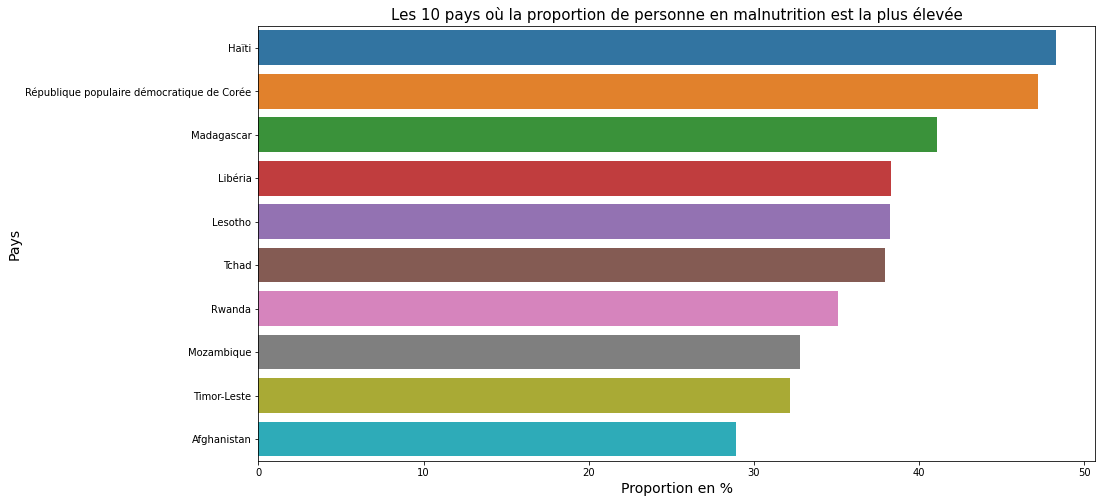

In [30]:
#Création du graphique

plt.figure(figsize = (15,8))

sns.barplot(data = df_q1, x = df_q1_10["proportion"], y = df_q1_10["pays"])

plt.title('Les 10 pays où la proportion de personne en malnutrition est la plus élevée', fontsize= 15)
plt.xlabel('Proportion en %' ,fontsize = 14)
plt.ylabel('Pays' ,fontsize = 14)
plt.show()

## Pays les plus aidés depuis 2013


In [31]:
#On groupe les valeurs par pays pour avoir le total d'aide recu depuis 2013

aide_total = aide.drop(columns = ["Année" ,"Produit"])

aide_total = aide_total.groupby( by='Pays bénéficiaire')['Valeur'].sum().reset_index()

aide_total_10 = aide_total.sort_values(by ="Valeur", ascending = False).head(10)
aide_total_10.head(10)


,Pays bénéficiaire,Valeur
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


Text(0, 0.5, 'Pays bénéficiaire')

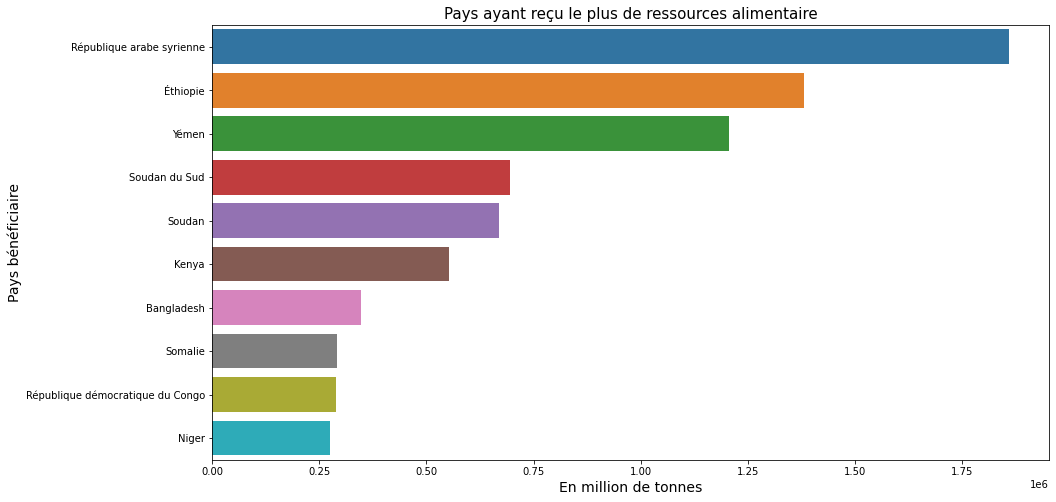

In [32]:
plt.figure(figsize = (15,8))
sns.barplot(data = aide_total_10 , x =aide_total_10['Valeur'], y=aide_total_10['Pays bénéficiaire'])
plt.title('Pays ayant reçu le plus de ressources alimentaire', fontsize = 15)
plt.xlabel('En million de tonnes' ,fontsize = 14)
plt.ylabel('Pays bénéficiaire' ,fontsize = 14)

## Pays ayant le plus/le moins de disponibilité/habitant

In [33]:
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


### Les pays avec le moins de disponibilité par habitant

In [34]:
# On groupe par pays (Zone) et on fait un somme de la dispo en kcal par personne 

dispo_habitant = dispo.groupby(by='Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()

# On trie par ordre croissant
dispo_habitant_bot = dispo_habitant.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)
dispo_habitant_bot10 = dispo_habitant_bot.head(10)




Text(0, 0.5, 'Pays')

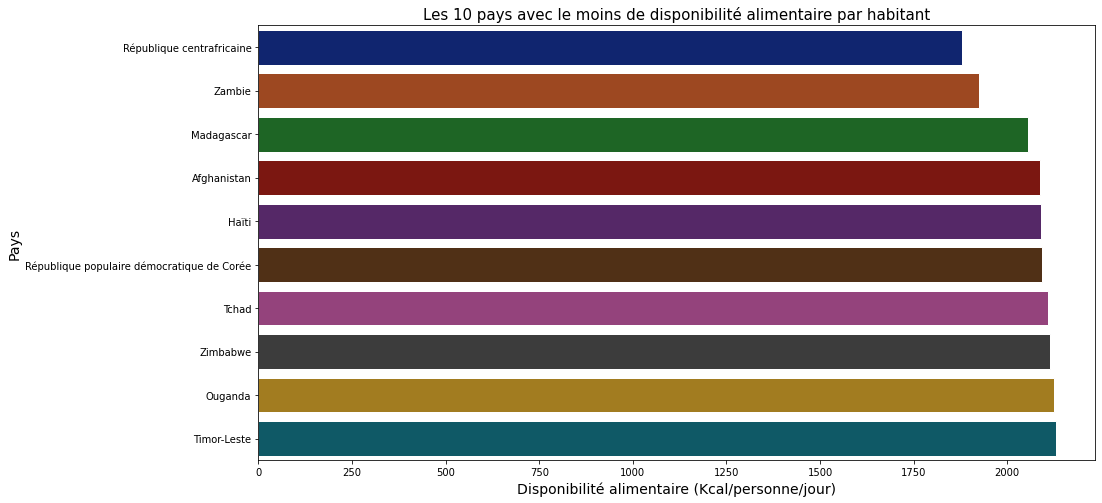

In [35]:
plt.figure(figsize = (15,8))
plt.title('Les 10 pays avec le moins de disponibilité alimentaire par habitant', fontsize = 15)

sns.set_theme( palette='dark')
sns.barplot(x =dispo_habitant_bot10['Disponibilité alimentaire (Kcal/personne/jour)'], y=dispo_habitant_bot10['Zone'] )
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)', fontsize = 14)
plt.ylabel('Pays', fontsize = 14)

### Les pays avec le plus de disponibilité par habitant




In [36]:
# On trie par ordre décroissant
dispo_habitant_top = dispo_habitant.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)
dispo_habitant_top10 = dispo_habitant_top.head(10)


Text(0, 0.5, 'Pays')

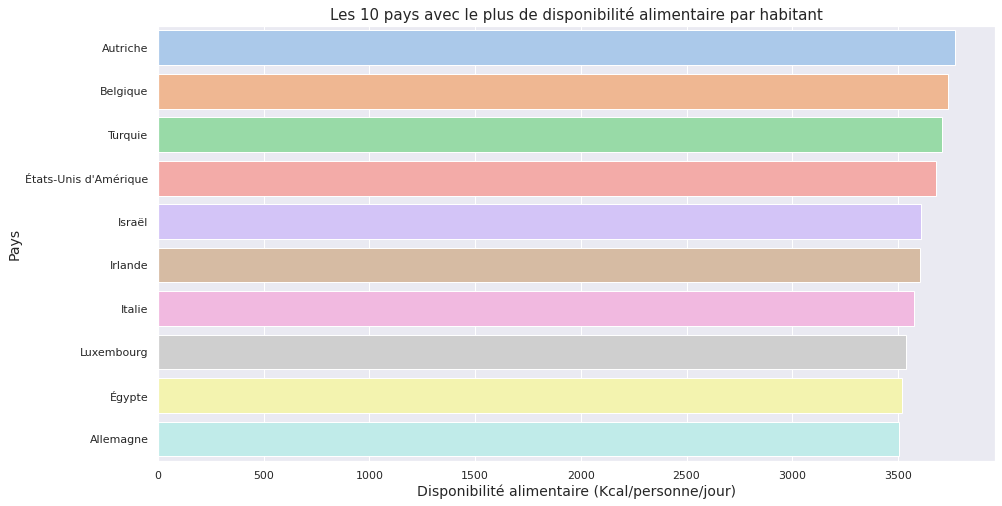

In [37]:
plt.figure(figsize = (15,8))
plt.title('Les 10 pays avec le plus de disponibilité alimentaire par habitant', fontsize = 15)

sns.set_theme( palette='pastel')
sns.barplot(x =dispo_habitant_top10['Disponibilité alimentaire (Kcal/personne/jour)'], y=dispo_habitant_top10['Zone'] )
plt.xlabel('Disponibilité alimentaire (Kcal/personne/jour)', fontsize = 14)
plt.ylabel('Pays', fontsize = 14)

## Complément


### Pays avec le nombres d'habitant en sous-nutrition le plus élevé

In [87]:
besoin2017.head()

,pays,annee,pop_sous_nutrition
4,Afghanistan,2017,10500.0
10,Afrique du Sud,2017,3100.0
16,Albanie,2017,100.0
22,Algérie,2017,1300.0
40,Angola,2017,5800.0


In [92]:
habitant_sous_nutirtion = besoin2017.sort_values(by='pop_sous_nutrition', ascending = False).head(10)

In [93]:
habitant_sous_nutirtion.head()

,pays,annee,pop_sous_nutrition
508,Inde,2017,190100.0
820,Pakistan,2017,24800.0
514,Indonésie,2017,23600.0
772,Nigéria,2017,22800.0
100,Bangladesh,2017,21500.0


Text(0.5, 0, "Nombre d'habitant en milliers")

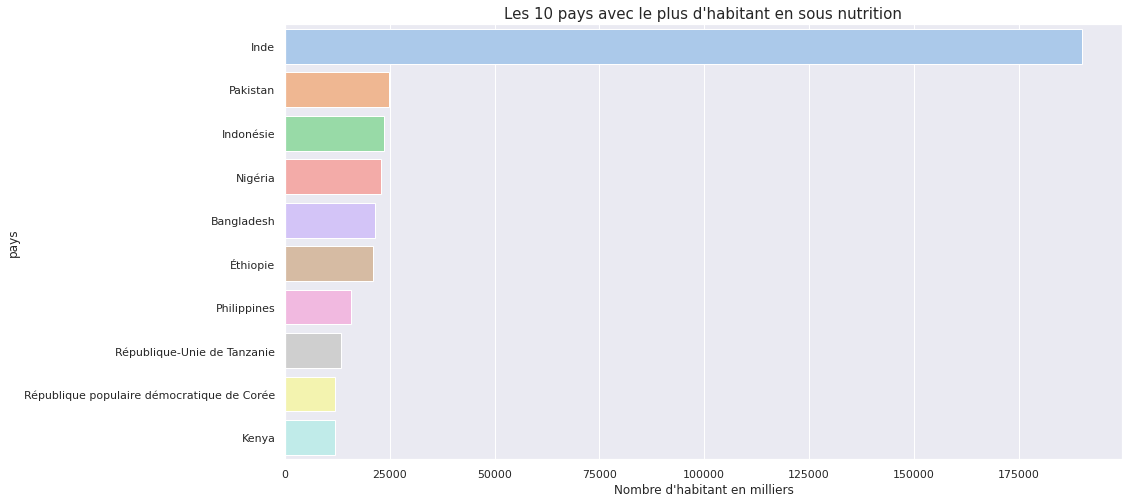

In [97]:
plt.figure(figsize = (15,8))
plt.title("Les 10 pays avec le plus d'habitant en sous nutrition", fontsize = 15)

sns.barplot(x=habitant_sous_nutirtion["pop_sous_nutrition"], y=habitant_sous_nutirtion["pays"])

plt.xlabel("Nombre d'habitant en milliers")

# Questions de Marc pour l'année 2017

##1- Proportion de personne en sous nutrition dans le monde

In [38]:
df_q1.head()

,pays,annee,pop_sous_nutrition,population_totale,proportion
0,Afghanistan,2017,10500.0,36296.113,28.93
1,Afrique du Sud,2017,3100.0,57009.756,5.44
2,Albanie,2017,100.0,2884.169,3.47
3,Algérie,2017,1300.0,41389.189,3.14
4,Angola,2017,5800.0,29816.766,19.45


In [39]:
# On réutilise le dataframe créé pour les pays les plus sous alimentés et on fait les calculs


population_mondiale_2017 = round(pop.loc[pop['annee'] == 2017, 'population_totale'].sum()/1000000,3)
print("En 2017 la population mondiale était de " + str(population_mondiale_2017) +" milliards d'habitants.")
print('')

population_sous_nutrition_2017 = round(df_q1['pop_sous_nutrition'].sum()/1000,5)
print("Le nombre de personnes en sous-nutrition en 2017 était de " + str(population_sous_nutrition_2017) + " millions." )
print('')

proportion_sous_nutrition_2017 = round(((population_sous_nutrition_2017/1000)/population_mondiale_2017)*100,3)
print("La proportion de personne en sous-nutrition s'élève à " + str(proportion_sous_nutrition_2017) + ' % de la population modiale en 2017.')

En 2017 la population mondiale était de 7.548 milliards d'habitants.

Le nombre de personnes en sous-nutrition en 2017 était de 535.7 millions.

La proportion de personne en sous-nutrition s'élève à 7.097 % de la population modiale en 2017.


In [40]:
df_q1.describe()

,annee,pop_sous_nutrition,population_totale,proportion
count,104.0,104.000000,1.040000e+02,104.000000
mean,2017.0,5150.961538,4.021953e+04,11.410096
std,0.0,19121.019772,1.360991e+05,11.452774
min,2017.0,0.000000,7.145800e+01,0.000000
25%,2017.0,300.000000,2.763785e+03,3.340000
50%,2017.0,1050.000000,1.074774e+04,7.395000
75%,2017.0,3975.000000,3.157317e+04,16.277500
max,2017.0,190100.000000,1.338677e+06,48.260000


## 2- Nombre total de personne qui peut être nourrie en théorie

### 2.1 - Disponibilité alimentaire totale

**D'après une étude de l'ANSES le besoin energetique moyen pour une personne est de 2350 kcal/jour**

In [41]:
# On crée un df avec seulement, le pays et la dispo alimentaire en kcal/personne 

dispo_total = dispo.groupby(by= 'Zone')["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()

#dispo_total  =dispo_total.drop(dispo_total.columns[4:16], axis =1)
#dispo_total = dispo_total.drop(dispo_total.columns[1:3], axis= 1)
dispo_total.head()



,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0


In [42]:

dispo_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Zone                                            174 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)  174 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [43]:
pop2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 4 to 1414
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pays               236 non-null    object 
 1   annee              236 non-null    int64  
 2   population_totale  236 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [44]:
# On fusionne/joint le df dispo_total et pays (pop2017) pour avoir le nombre d'habitant par pays dans le même df


dispo_q2 = pd.merge(dispo_total, pop2017, left_on='Zone', right_on='pays', how='outer')

# On recherche les potentielles différences entre le nom des pays pour les df
dispo_q2.loc[dispo_q2['pays'].isna(),:]


,Zone,Disponibilité alimentaire (Kcal/personne/jour),pays,annee,population_totale
126,Royaume-Uni,3425.0,NaN,NaN,NaN
152,Tchéquie (la),3255.0,NaN,NaN,NaN


In [45]:
# On recherche les potentielles différence entre le nom des pays pour les df
pop2017.loc[pop2017['pays'].str.contains('Royaume') | pop2017['pays'].str.contains('Tchéquie') ]


,pays,annee,population_totale
1114,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66727.461
1306,Tchéquie,2017,10641.034


In [46]:
# On remplace les différences dans le df dispo_total
dispo_total.replace(['Tchéquie (la)'], ['Tchéquie'], inplace=True)
dispo_total.replace(['Royaume-Uni'],["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"], inplace=True)

In [47]:
dispo_total.loc[dispo_total['Zone'] =='Tchéquie']

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
152,Tchéquie,3255.0


In [48]:
# On refait une fusion avec les noms qui correspondent
dispo_q2 = pd.merge(dispo_total, pop2017, left_on='Zone', right_on='pays', how='outer')
#dispo_q3.loc[dispo_q3['pays'].isna(),:]
dispo_q2.loc[dispo_q2['Zone'] =='Tchéquie']

,Zone,Disponibilité alimentaire (Kcal/personne/jour),pays,annee,population_totale
152,Tchéquie,3255.0,Tchéquie,2017,10641.034


In [49]:
# Supression des colonnes inutiles + on met la population en unité


dispo_q2['population_unitaire'] = dispo_q2['population_totale']*1000
dispo_q2.drop(columns=['pays',"annee",'population_totale'], inplace = True)
dispo_q2.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),population_unitaire
0,Afghanistan,2087.0,36296113.0
1,Afrique du Sud,3020.0,57009756.0
2,Albanie,3188.0,2884169.0
3,Algérie,3293.0,41389189.0
4,Allemagne,3503.0,82658409.0


In [50]:
# Vérification des suppressions 
dispo_q2.loc[dispo_q2['Zone'] == 'Tchéquie (la)']

,Zone,Disponibilité alimentaire (Kcal/personne/jour),population_unitaire


In [51]:
# Ajout colonne Disponibilité alimentaire kcal/jour

dispo_q2['Disponibilité alimentaire (Kcal/jour)'] = dispo_q2['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_q2['population_unitaire']
dispo_q2


,Zone,Disponibilité alimentaire (Kcal/personne/jour),population_unitaire,Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,2087.0,36296113.0,7.574999e+10
1,Afrique du Sud,3020.0,57009756.0,1.721695e+11
2,Albanie,3188.0,2884169.0,9.194731e+09
3,Algérie,3293.0,41389189.0,1.362946e+11
4,Allemagne,3503.0,82658409.0,2.895524e+11
...,...,...,...,...
231,NaN,NaN,14589179.0,NaN
232,NaN,NaN,10910763.0,NaN
233,NaN,NaN,1300.0,NaN
234,NaN,NaN,101998.0,NaN


In [52]:
# En prenant on compte que la moyenne pour un humain est de 2350kcal/jour

theorie_tot = round(dispo_q2['Disponibilité alimentaire (Kcal/jour)'].sum()/2350/10**9,3)

print("En théorie avec la disponibilité alimentaire en 2017 on pourrait nourrir " + 
      str(round(dispo_q2['Disponibilité alimentaire (Kcal/jour)'].sum()/2350/10**9,3)) + ' milliards de personnes.')

En théorie avec la disponibilité alimentaire en 2017 on pourrait nourrir 9.014 milliards de personnes.


### 2.2 - Disponibilité végétale

In [53]:
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [54]:
# On séléction les données pour les disponibilités d'origine végétale
dispo_vege = dispo.loc[dispo["Origine"] == 'vegetale']

#dispo_vege['Disponibilité alimentaire (Kcal/personne/jour)'].astype(float)
dispo_vege = dispo_vege.groupby(by= 'Zone')["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()


# On renomme les deux pays qui sont écrit différent pour pouvoir faire la jointure avec le df pop2017
dispo_vege.replace(['Tchéquie (la)'], ['Tchéquie'], inplace=True)
dispo_vege.replace(['Royaume-Uni'],["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"], inplace=True)

dispo_vege_q2 = dispo_vege.merge(pop2017, left_on='Zone' , right_on='pays', how='inner')

#Calculs + affichage résultat
dispo_vege_q2['population_unitaire'] = dispo_vege_q2['population_totale']*1000
dispo_vege_q2.drop(columns=['pays',"annee",'population_totale'], inplace = True)


dispo_vege_q2['Disponibilité alimentaire (Kcal/jour)'] = dispo_vege_q2['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_vege_q2['population_unitaire']

theorie_vege = round((dispo_vege_q2["Disponibilité alimentaire (Kcal/jour)"].sum()/2350)/10**9,3)


print("Avec seulement la disponibilité végétale on pourrait nourrir : " + str(round((dispo_vege_q2["Disponibilité alimentaire (Kcal/jour)"].sum()/2350)/10**9,3))
+ " milliards personnes dans le monde.")



Avec seulement la disponibilité végétale on pourrait nourrir : 7.425 milliards personnes dans le monde.


### 2.3 Graph

Text(2, 7.5, '7.425 milliards de personnes')

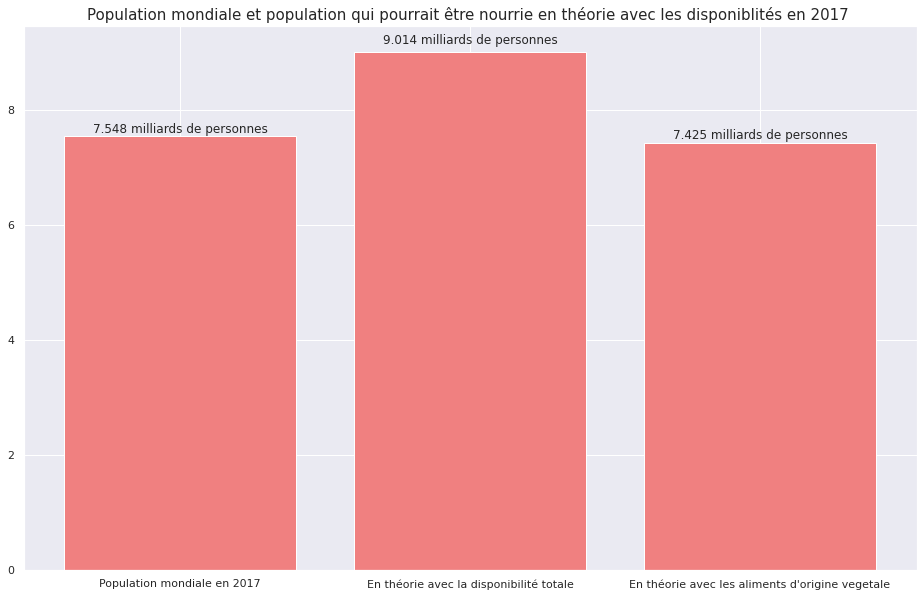

In [55]:
population_mondiale_2017
theorie_vege
theorie_tot
theorique = [population_mondiale_2017,theorie_tot,theorie_vege]

plt.figure(figsize = (16,10))
plt.bar(x= ['Population mondiale en 2017', "En théorie avec la disponibilité totale", "En théorie avec les aliments d'origine vegetale"], height= theorique, alpha =1 ,color = "lightcoral")


plt.title("Population mondiale et population qui pourrait être nourrie en théorie avec les disponiblités en 2017 ", size =15)
plt.text(1,9.15,(str(theorie_tot)+" milliards de personnes"),size = 12, ha = "center")
plt.text(0,7.600,(str(population_mondiale_2017)+" milliards de personnes"),size = 12, ha = "center")
plt.text(2,7.500,(str(theorie_vege)+" milliards de personnes"),size = 12 , ha = "center")



## 3- L’utilisation de la disponibilité intérieure

La **fomule qui lie l'acquisition et l'utilisation de la disponibilité intérieure** est la suivante :

Production + Importations + Variation - *Exportations* **= DISPONIBILITE =** Aliments pour animaux + Nourriture + Semences + Traitement + Autres utilisations - *Pertes*


In [56]:
dispo.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


### 3.1 - Alimentation animale

In [57]:
# Total de la disponibilité interieure
dispo_interieure_totale = dispo['Disponibilité intérieure'].sum()

# Total des aliments pour animaux
alim_animaux_totale = dispo['Aliments pour animaux'].sum()

prop_alim_animale = round((alim_animaux_totale/dispo_interieure_totale)*100,2)

print("La part de la disponibilité intérieure utilisée pour l'alimentation animale est de : " + str(prop_alim_animale) + "% .")


La part de la disponibilité intérieure utilisée pour l'alimentation animale est de : 13.24% .


### 3.2 - Alimentation perdue

In [58]:
# Total des pertes
alim_pertes_totale = dispo['Pertes'].sum()

prop_alim_pertes = round((alim_pertes_totale/dispo_interieure_totale)*100,2)

print("La part de la disponibilité intérieure perdue est de : " + str(prop_alim_pertes) + "% .")

La part de la disponibilité intérieure perdue est de : 4.61% .


### 3.3 - Alimentation humaine

In [59]:
# Total de la nourriture
alim_nourriture_totale = dispo['Nourriture'].sum()

prop_alim_nourriture = round((alim_nourriture_totale/dispo_interieure_totale)*100,2)

print("La part de la disponibilité intérieure utilisée pour l'alimentation humaine est de : " + str(prop_alim_nourriture) + "% .")

La part de la disponibilité intérieure utilisée pour l'alimentation humaine est de : 49.51% .


### Graphique répartition de la disponibilité


In [60]:
# On créé une colonne total pour pouvoir group tout les totaux
dispo['Total'] = 'Total'

# On supprime les colonnes inutiles pour plus de lisibilité
dispo_repartition = dispo.drop(dispo.columns[[0,1,2,5,6,7,8,9,10,11,14,17]], axis = 1)

df_dispo_repartition = dispo_repartition.groupby(by='Total').sum()
df_dispo_repartition = df_dispo_repartition.T
df_dispo_repartition.head(6)


#df_dispo_3 

Total,Total
Aliments pour animaux,1304245.0
Autres Utilisations,865023.0
Nourriture,4876258.0
Pertes,453698.0
Semences,154681.0
Traitement,2204687.0


Text(0.5, 1.0, 'Utilisation de la disponibilité alimentaire en 2017')

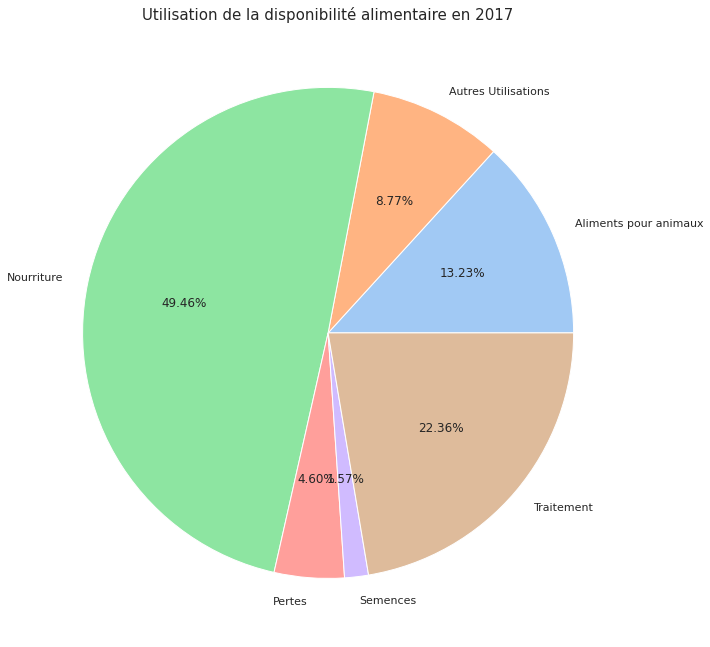

In [61]:
plt.figure(figsize = (11,13))


plt.pie(x=df_dispo_repartition.head(6), labels = ['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement'], autopct = '%.2f%%')
plt.title('Utilisation de la disponibilité alimentaire en 2017', fontsize = 15)


In [62]:
#dispo_total = dispo_total.drop(dispo_total.columns[4:16], axis =1)
#dispo_total = dispo_total.drop(dispo_total.columns[1:3], axis= 1)

# Questions Julien

## Manioc

In [63]:
# On sélectionne les données de disponibilité alimentaire pour la Thailande et le produit Manioc

dispo_manioc_thai = dispo.loc[(dispo['Zone'] == 'Thaïlande') & (dispo['Produit']== 'Manioc')].reset_index(drop=True)

In [64]:
dispo_manioc_thai.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Total
0,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0,Total


Dans un kilo de manioc il y a environ 1570 kcal.

Source : santémagazine

https://www.santemagazine.fr/alimentation/nutriments/guide-des-calories/pommes-de-terre-et-autres-tubercules/manioc-917985#:~:text=Combien%20de%20calories%20dans%20le%20manioc%20%3F&text=100g%20de%20manioc%20apportent%20157%20kilocalories%20(kcal).

In [65]:
exportation_manioc = dispo_manioc_thai.iloc[0,10]
prodcution_manioc = dispo_manioc_thai.iloc[0,14]

print("La Thailande exporte " + str(int(exportation_manioc))+ " milliers de tonnes de manioc. Soit " + str(round((exportation_manioc/prodcution_manioc)*100,2)) + "% de sa production. """)


La Thailande exporte 25214 milliers de tonnes de manioc. Soit 83.41% de sa production. 


In [66]:
manioc_kcal = 1570

In [67]:
# Représentation en kcal de l'exportation
manioc_kcal_exportation = exportation_manioc*(10**6)*manioc_kcal

In [68]:
df_q1.loc[df_q1['pays']=='Thaïlande']

,pays,annee,pop_sous_nutrition,population_totale,proportion
95,Thaïlande,2017,6200.0,69209.81,8.96


In [69]:
# Population en Thailande et population en sous nutrition
population_thai = df_q1.loc[df_q1['pays']=='Thaïlande'].iloc[0,3]*10**3
population_thai
population_thai_sousnutrition = df_q1.loc[df_q1['pays']=='Thaïlande'].iloc[0,2]*10**3
population_thai_sousnutrition

6200000.0

In [70]:
# Le nombre de personne qui pourrait être nourrie avec la quantité de manioc exporté et conclusion 

manioc_personne = round(manioc_kcal_exportation/2350/365,0)

print("On pourrai nourrir " + str(round(manioc_personne/10**6,3)) +" millions de personnes avec la quantité de manioc exporté.")

print("Soit "  + str(round(manioc_personne/population_thai*100,2)) + " % de la population de la Thailande.")
print()
print("En 2017 la proportion de personnes en sous-nutrition en Thailande était de " + str(df_q1.loc[df_q1['pays']=='Thaïlande'].iloc[0,4]) + "%.")

On pourrai nourrir 46.151 millions de personnes avec la quantité de manioc exporté.
Soit 66.68 % de la population de la Thailande.

En 2017 la proportion de personnes en sous-nutrition en Thailande était de 8.96%.


In [71]:
potentiel_manioc = round(manioc_personne,3)
potentiel_manioc

46150953.0

Text(0, 0.5, ' en million de personnes')

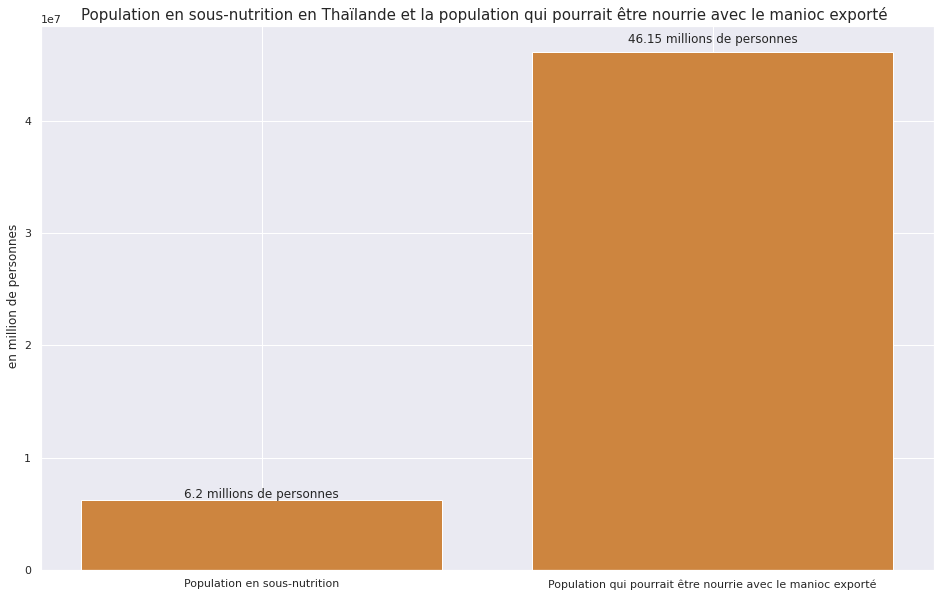

In [72]:
thailande = [population_thai_sousnutrition,potentiel_manioc]

plt.figure(figsize = (16,10))
plt.bar(x= ['Population en sous-nutrition', "Population qui pourrait être nourrie avec le manioc exporté"], height= thailande, alpha =1 ,color = "peru")


plt.title("Population en sous-nutrition en Thaïlande et la population qui pourrait être nourrie avec le manioc exporté ", size =15)
plt.text(1, 4.7*10**7 ,(str(round(potentiel_manioc/10**6,2))+ " millions de personnes") ,size = 12, ha = "center")
plt.text(0, 0.64*10**7 ,(str(population_thai_sousnutrition/10**6)+" millions de personnes") ,size = 12, ha = "center")

plt.ylabel(" en million de personnes")


## Céréales

Listes des céréales : Blé et produits, Riz (Eq Blanchi)	,Orge et produits,	Maïs et produits,	Seigle et produits,	Avoine, Millet et produits,	Sorgho et produits, (Céréales, Autres)	

In [73]:
cereales = ['Blé et produits', 'Riz (Eq Blanchi)' ,'Orge et produits', 'Maïs et produits', 'Seigle et produits', 'Avoine','Millet et produits', 'Sorgho et produits', 'Céréales, Autres']

In [74]:
dispo_cereales = dispo.loc[dispo['Produit'].isin(cereales), ('Produit','Origine','Aliments pour animaux', 'Nourriture', 'Disponibilité intérieure')]
display(dispo_cereales)

,Produit,Origine,Aliments pour animaux,Nourriture,Disponibilité intérieure
12,"Céréales, Autres",vegetale,NaN,0.0,0.0
47,Riz (Eq Blanchi),vegetale,NaN,422.0,461.0
67,Avoine,vegetale,8.0,40.0,49.0
81,"Céréales, Autres",vegetale,8.0,4.0,12.0
138,Riz (Eq Blanchi),vegetale,NaN,919.0,920.0
...,...,...,...,...,...
15441,Avoine,vegetale,NaN,57.0,60.0
15454,"Céréales, Autres",vegetale,0.0,2495.0,3274.0
15510,Riz (Eq Blanchi),vegetale,NaN,212.0,212.0
15545,"Céréales, Autres",vegetale,NaN,0.0,0.0


In [75]:
dispo_cereales_total = dispo_cereales.groupby(by = 'Origine').sum()
dispo_cereales_total.head()

,Aliments pour animaux,Nourriture,Disponibilité intérieure
Origine,,,
vegetale,68880.0,386513.0,526548.0


In [76]:
dispo_cereales_total['Autres utilisations'] = dispo_cereales_total['Disponibilité intérieure']-dispo_cereales_total['Nourriture']-dispo_cereales_total["Aliments pour animaux"]
dispo_cereales_total.drop( columns ='Disponibilité intérieure', inplace=True)

In [77]:
dispo_cereales_total.T

Origine,vegetale
Aliments pour animaux,68880.0
Nourriture,386513.0
Autres utilisations,71155.0


Text(0.5, 1.0, 'Utilisations des céréales en 2017')

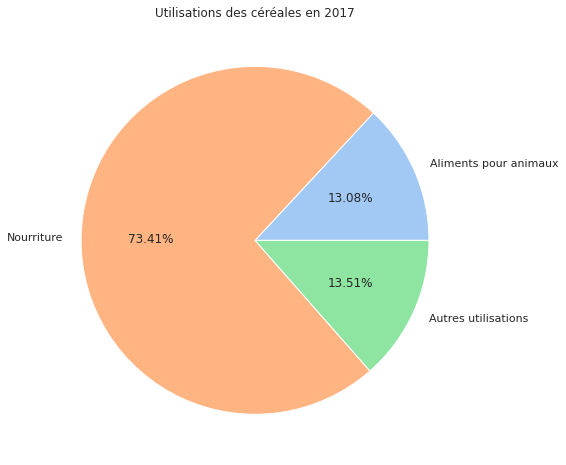

In [78]:
plt.figure(figsize = (9,8))

plt.pie(x=dispo_cereales_total.head(3), labels = ['Aliments pour animaux','Nourriture', 'Autres utilisations'], autopct = '%.2f%%')
plt.title('Utilisations des céréales en 2017')